In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import joblib

In [2]:
# Load the dataset
data = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
data.diabetes.value_counts()/len(data)*100

0    91.5
1     8.5
Name: diabetes, dtype: float64

In [8]:
data.gender.value_counts()/len(data)*100

Female    58.552
Male      41.430
Other      0.018
Name: gender, dtype: float64

In [9]:
# Mapping values in the "gender" column
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
data['gender'] = data['gender'].map(gender_mapping)

In [10]:
data.hypertension.value_counts()/len(data)*100

0    92.515
1     7.485
Name: hypertension, dtype: float64

In [11]:
data.heart_disease.value_counts()/len(data)*100

0    96.058
1     3.942
Name: heart_disease, dtype: float64

In [12]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [13]:
data.smoking_history.value_counts()/len(data)*100

No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: smoking_history, dtype: float64

In [14]:
# Mapping values in the "smoking_history" column
smoking_mapping = {'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5}
data['smoking_history'] = data['smoking_history'].map(smoking_mapping)

In [15]:
# Normalizing features
# scaler = StandardScaler()
# data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [16]:
# Split the dataset into features and target
X = data.drop(columns='diabetes')
y = data['diabetes']

In [17]:
# Random Forest Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X, y)
# sfm_rf = SelectFromModel(rf, prefit=True)
# X_rf = sfm_rf.transform(X)

RandomForestClassifier(random_state=42)

In [18]:
# XGBoost Feature Selection
# xgb = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=(1 - 0.085) / 0.085)
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X, y)
# sfm_xgb = SelectFromModel(xgb, prefit=True)
# X_xgb = sfm_xgb.transform(X)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [19]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,0,24.60,5.7,145
44966,0,38.0,0,0,4,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,2,22.11,4.5,85


In [21]:
y_train.head()

75220    0
48955    1
44966    0
13568    0
92727    0
Name: diabetes, dtype: int64

In [22]:
# Hybrid Fusion Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=(1 - 0.085) / 0.085)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
hybrid_model = StackingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], final_estimator=LogisticRegression())

In [23]:
# Model Training
hybrid_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_t...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [24]:
# Evaluation
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_hybrid = hybrid_model.predict(X_test)

In [25]:
# Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18292
           1       1.00      0.99      0.99      1708

    accuracy                           1.00     20000
   macro avg       1.00      0.99      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [26]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.72      0.83      1708

    accuracy                           0.98     20000
   macro avg       0.98      0.86      0.91     20000
weighted avg       0.98      0.98      0.97     20000



In [27]:
print("Hybrid Model Classification Report:")
print(classification_report(y_test, y_pred_hybrid))

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [28]:
# Accuracy Comparison
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_hybrid = accuracy_score(y_test, y_pred_hybrid)

In [29]:
print(f"Random Forest Accuracy: {acc_rf}")
print(f"XGBoost Accuracy: {acc_xgb}")
print(f"Hybrid Model Accuracy: {acc_hybrid}")

Random Forest Accuracy: 0.99875
XGBoost Accuracy: 0.97545
Hybrid Model Accuracy: 0.9702


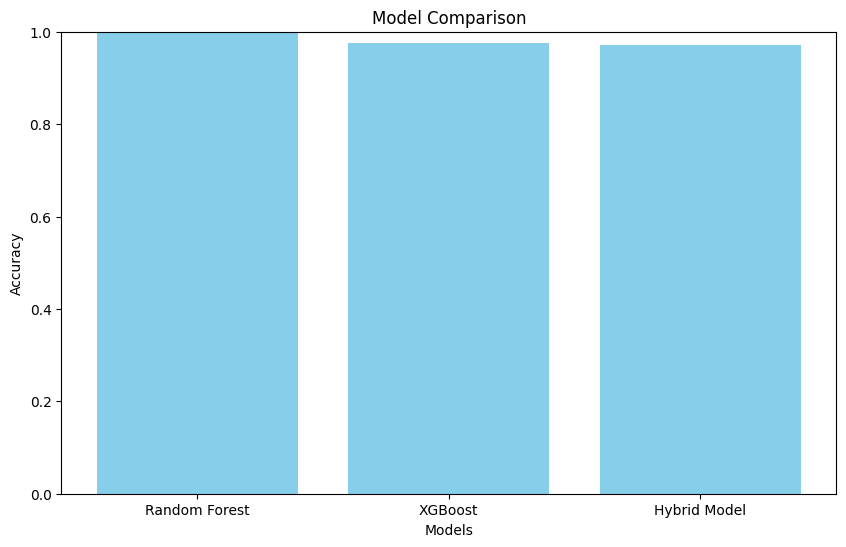

In [30]:
# Plotting
models = ['Random Forest', 'XGBoost', 'Hybrid Model']
accuracies = [acc_rf, acc_xgb, acc_hybrid]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.0, 1.0)
plt.show()

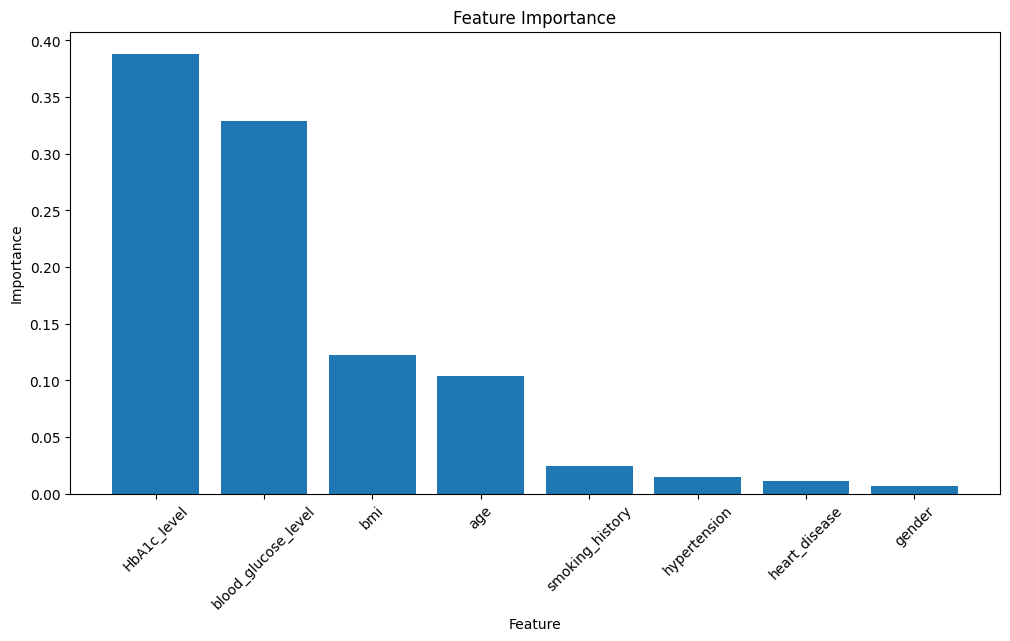

In [31]:
import matplotlib.pyplot as plt

# Assuming 'best_model' is the final best model
feature_importance = hybrid_model.named_estimators_['rf'].feature_importances_

# Get feature names
feature_names = data.drop(columns='diabetes').columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance graph
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [32]:
# # Load the best model
# loaded_model = joblib.load('best_model.pkl')

# # Use the loaded model for predictions
# loaded_model.predict(X_test_rf)

In [33]:
import sklearn
print(sklearn.__version__)

1.2.2


In [34]:
print(joblib.__version__)

1.3.2


In [35]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [36]:
y_train.value_counts()

0    73208
1     6792
Name: diabetes, dtype: int64

In [37]:
# Hybrid Fusion Model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=91.5/8.5)
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_delta_step=1)
final = StackingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], final_estimator=LogisticRegression())

In [38]:
# Model Training
final.fit(X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']], y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=1, max_depth=None,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [39]:
y_pred_hybrid = final.predict(X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
print("Hybrid Model Classification Report:")
print(classification_report(y_test, y_pred_hybrid))

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [40]:
# Save the best model
joblib.dump(final, 'Diabetes_best_model.pkl')

['Diabetes_best_model.pkl']

In [47]:
Dia = X_test[(y_test == 1) & (y_pred_hybrid == 1)][['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

In [48]:
Dia.shape

(1193, 4)

In [49]:
Dia.head()

,age,bmi,HbA1c_level,blood_glucose_level
16130,39.0,44.38,7.0,130
25330,58.0,32.48,8.8,155
35718,51.0,34.06,8.8,159
64290,78.0,39.14,8.8,159
15663,70.0,27.17,8.8,155


In [50]:
NDia = X_test[(y_test == 0) & (y_pred_hybrid == 0)][['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

In [51]:
NDia.shape

(18211, 4)

In [52]:
NDia.head()

,age,bmi,HbA1c_level,blood_glucose_level
75721,13.0,20.82,5.8,126
80184,3.0,21.00,5.0,145
19864,63.0,25.32,3.5,200
76699,2.0,17.43,6.1,126
76434,70.0,23.89,6.5,200
